

<center>
    <img src="https://miro.medium.com/v2/resize:fit:300/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg">
</center>



The goal of PCA is to extract information while reducing the number of features
from a dataset by identifying which existing features relate to another. The crux of the algorithm is trying to determine the relationship between existing features, called principal components, and then quantifying how relevant these principal components are. The principal components are used to transform the high dimensional data to a lower dimensional data while preserving as much information. For a principal component to be relevant, it needs to capture information about the features. We can determine the relationships between features using covariance.

In [15]:
#import necessary packages
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [16]:

data = np.array([
    [   1,   2,  -1,   4,  10],
    [   3,  -3,  -3,  12, -15],
    [   2,   1,  -2,   4,   5],
    [   5,   1,  -5,  10,   5],
    [   2,   3,  -3,   5,  12],
    [   4,   0,  -3,  16,   2],
])

### Step 1: Standardize the Data along the Features

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLxe5VYCBsaZddkkTZlCY24Yov4JJD4-ArTA&usqp=CAU)




Explain why we need to handle the data on the same scale.

**[TO DO: Insert Answer here]**

In [17]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

![cov matrix.webp](https://dmitry.ai/uploads/default/original/1X/9bd2851674ebb55e404cc3ff5e2ffe65b42ff460.png)

We use the pair - wise covariance of the different features to determine how they relate to each other. With these covariances, our goal is to group / cluster based on similar patterns. Intuitively, we can relate features if they have similar covariances with other features.

### Step 2: Calculate the Covariance Matrix



In [18]:

cov_matrix = np.cov(standardized_data.T)

print(cov_matrix)

[[ 1.2        -0.42098785 -1.0835838   0.90219291 -0.37000528]
 [-0.42098785  1.2         0.20397003 -0.77149364  1.18751836]
 [-1.0835838   0.20397003  1.2        -0.59947269  0.22208218]
 [ 0.90219291 -0.77149364 -0.59947269  1.2        -0.70017993]
 [-0.37000528  1.18751836  0.22208218 -0.70017993  1.2       ]]


### Step 3: Eigendecomposition on the Covariance Matrix


In [19]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors

(array([3.80985761e+00, 1.73655615e+00, 4.94531029e-02, 4.74189469e-05,
        4.04085720e-01]),
 array([[-0.4640131 ,  0.45182808, -0.70733581,  0.28128049, -0.03317471],
        [ 0.45019005,  0.48800851,  0.29051532,  0.6706731 , -0.15803498],
        [ 0.37929082, -0.55665017, -0.48462321,  0.24186072, -0.5029143 ],
        [-0.4976889 ,  0.03162214,  0.36999674, -0.03373724, -0.78311558],
        [ 0.43642295,  0.49682965, -0.20861365, -0.64143906, -0.32822489]]))

### Step 4: Sort the Principal Components
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

In [20]:
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list

order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]

print('\n\n sorted eigen values:\n{}'.format(sorted_eigenvalues))
sorted_eigenvectors = eigenvectors[:, order_of_importance] # sort the columns
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [0 1 4 2 3]


 sorted eigen values:
[3.80985761e+00 1.73655615e+00 4.04085720e-01 4.94531029e-02
 4.74189469e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


Question:

1. Why do we order eigen values and eigen vectors?

  We order eigenvalues and eigenvectors to identify the most important principal components, as eigenvalues indicate how much variance each component has. By sorting them in descending order, it helps prioritize components that capture the most information, enabling a better interpretability while retaining key data patterns.

2. Is it true we would consider the lowest eigen value compared to the highest? Defend your answer

  I think we would consider the lowest eigen values in some rare cases where we want to identify small subtle patterns within the data, but generally the highest eigen values are prioritized because they are more informative and offer a larger amount of variance in regards to the principal components.


You want to see what percentage of information each eigen value holds. You would have print out the percentage of each eigen value using the formula



> (sorted eigen values / sum of all sorted eigen values) * 100



In [21]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors

explained_variance = (sorted_eigenvalues / sorted_eigenvalues.sum()) * 100
explained_variance =["{:.2f}%".format(value) for value in explained_variance]
print( explained_variance)

['63.50%', '28.94%', '6.73%', '0.82%', '0.00%']


#Initialize the number of Principle components then perfrom matrix multiplication with the variable K example k = 3 for 3 priciple components




> The resulting matrix (with reduced data) = standardized data * vector with columns k

See expected output for k = 2



In [22]:
k =  3

reduced_data = np.matmul(standardized_data, sorted_eigenvectors)

In [13]:
print(reduced_data)

[[ 2.35771160e+00 -7.57288669e-01 -3.04991031e-01 -9.10437355e-02
  -9.68857132e-03]
 [-2.27171739e+00 -1.81970663e+00  4.47040504e-01  1.30850234e-01
  -1.74857841e-03]
 [ 1.21259114e+00 -5.03909310e-01  3.55469378e-01 -2.53347707e-01
   9.79649838e-03]
 [-1.41935914e+00  1.92298560e+00  4.89188445e-01 -1.45019257e-01
  -4.82511129e-03]
 [ 1.61562536e+00  8.75418575e-01  1.68123639e-01  3.69485806e-01
   3.15328608e-03]
 [-1.49485157e+00  2.82500437e-01 -1.15483094e+00 -1.09253405e-02
   3.31247656e-03]]


In [23]:
print(reduced_data.shape)

(6, 5)


In [28]:
import pandas as pd
pca_2_components = PCA(n_components=2)
reduced_data = pca_2_components.fit_transform(standardized_data)
reduced_data_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
print(reduced_data_df)
print (explained_variance, reduced_data.shape)

        PC1       PC2
0  2.357712 -0.757289
1 -2.271717 -1.819707
2  1.212591 -0.503909
3 -1.419359  1.922986
4  1.615625  0.875419
5 -1.494852  0.282500
['63.50%', '28.94%', '6.73%', '0.82%', '0.00%'] (6, 2)


# *What are 2 positive effects and 2 negative effects of PCA

Give 2 Benefits and 2 limitations
# POSITIVES
- It enables swift introductory analysis.
- It helps you understand your data on a surface level and saves time.

# NEGATIVES
- The analysis method is not thourough and indepth, therefore there might be inconsistencies in the accuracy of the results.
- PCA presents limitations when it comes to interpretability. Since we're transforming the data, features lose their original meaning.

# SECOND ANALYSIS USING THE "fuel_econ" DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
data2 = pd.read_csv('/content/drive/MyDrive/ALU/fuel_econ.csv')
data2.head ()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# STEP 1: Standardizing The Data

In [30]:
#Highlight the numerical data then standardize
numerical_columns = [
    'cylinders', 'displ', 'city', 'UCity', 'highway', 'UHighway',
    'comb', 'co2', 'feScore', 'ghgScore'
]
numerical_data = data2[numerical_columns].dropna()
standardized_data = scaler.fit_transform(numerical_data)


# STEP 2: Calculating The Covariance Matrix

In [31]:
cov_matrix1 = np.cov(standardized_data.T)

print(cov_matrix1)

[[ 1.00025458  0.93411019 -0.69327904 -0.66619842 -0.76646982 -0.77169964
  -0.73821112  0.84848979 -0.78405759 -0.78201448]
 [ 0.93411019  1.00025458 -0.71366074 -0.6863403  -0.78418374 -0.78865771
  -0.75859024  0.85559254 -0.7936343  -0.79141752]
 [-0.69327904 -0.71366074  1.00025458  0.99663082  0.9156677   0.90989004
   0.98980432 -0.90453509  0.9059112   0.89902154]
 [-0.66619842 -0.6863403   0.99663082  1.00025458  0.89978578  0.89804238
   0.98135571 -0.8860481   0.89152389  0.88468357]
 [-0.76646982 -0.78418374  0.9156677   0.89978578  1.00025458  0.99244327
   0.9630022  -0.91668944  0.91434884  0.89781322]
 [-0.77169964 -0.78865771  0.90989004  0.89804238  0.99244327  1.00025458
   0.95682339 -0.91234956  0.91158665  0.89454192]
 [-0.73821112 -0.75859024  0.98980432  0.98135571  0.9630022   0.95682339
   1.00025458 -0.92963549  0.92909879  0.91904062]
 [ 0.84848979  0.85559254 -0.90453509 -0.8860481  -0.91668944 -0.91234956
  -0.92963549  1.00025458 -0.94086368 -0.94480617]


# STEP 3: Eigendecomposition on the Covariance Matrix

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix1)

print(eigenvalues, eigenvectors)

[8.84730337e+00 6.67702093e-01 1.97957320e-01 1.56642445e-01
 6.56749106e-02 5.09901088e-02 9.38311059e-03 4.31401016e-03
 2.18409060e-03 3.94363265e-04] [[ 0.28375385  0.61039118 -0.09948505 -0.17154364 -0.67605413  0.22329265
   0.01770715 -0.0176749  -0.00671151  0.00144201]
 [ 0.28822685  0.574993   -0.15926252 -0.17324798  0.72616419  0.0557668
  -0.00273307 -0.00409296 -0.02083836 -0.00678931]
 [-0.32030196  0.30620037  0.09908369  0.41454238  0.00213767 -0.06720823
  -0.16862221 -0.02277963 -0.46306804  0.61162009]
 [-0.31547813  0.34876194  0.10595195  0.46257394  0.01089318 -0.12215146
   0.33984451  0.02217467  0.64178886 -0.10353553]
 [-0.32427103  0.1027842   0.34015226 -0.48319392  0.01686264  0.02430184
  -0.5610654   0.08043514  0.40976055  0.21227566]
 [-0.32370216  0.08856727  0.35907789 -0.49252161  0.01883343 -0.05236185
   0.66322021  0.00801798 -0.26737839  0.03667809]
 [-0.32863234  0.22969644  0.17498666  0.11316021 -0.00210197 -0.03232589
  -0.30850687  0.012072

# STEP 4: Sort the Principal Components

ORDER OF IMPORTANCE ROUTE

In [38]:
order_of_importance = np.argsort(eigenvalues)[::-1]
print ( 'the order of importance is :\n {}'.format(order_of_importance))

# utilize the sort order to sort eigenvalues and eigenvectors
sorted_eigenvalues1 = eigenvalues[order_of_importance]

print('\n\n sorted eigen values:\n{}'.format(sorted_eigenvalues))
sorted_eigenvectors1 = eigenvectors[:, order_of_importance] # sort the columns
print('\n\n The sorted eigen vector matrix is: \n {}'.format(sorted_eigenvectors))

the order of importance is :
 [0 1 2 3 4 5 6 7 8 9]


 sorted eigen values:
[3.80985761e+00 1.73655615e+00 4.04085720e-01 4.94531029e-02
 4.74189469e-05]


 The sorted eigen vector matrix is: 
 [[-0.4640131   0.45182808 -0.03317471 -0.70733581  0.28128049]
 [ 0.45019005  0.48800851 -0.15803498  0.29051532  0.6706731 ]
 [ 0.37929082 -0.55665017 -0.5029143  -0.48462321  0.24186072]
 [-0.4976889   0.03162214 -0.78311558  0.36999674 -0.03373724]
 [ 0.43642295  0.49682965 -0.32822489 -0.20861365 -0.64143906]]


CHECKING THE % OF INFORMATION THE EIGEN VALUES HOLD.

In [39]:
# use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors

explained_variance1 = (sorted_eigenvalues / sorted_eigenvalues.sum()) * 100
explained_variance1 =["{:.2f}%".format(value) for value in explained_variance1]
print( explained_variance1)

['63.50%', '28.94%', '6.73%', '0.82%', '0.00%']


CALCULATING THE PCA (2nd Route)

In [33]:
pca_new = PCA(n_components=len(numerical_columns))  # Using all components first
pca_new.fit(standardized_data)

PCA(n_components=10)

USING 2 COLUMNS FOR THE PCA ANALYSIS [PC 1 & 2]

In [43]:
explained_variance_new = pca_new.explained_variance_ratio_
pca_2_components_new = PCA(n_components=2)
reduced_data_new = pca_2_components_new.fit_transform(standardized_data)
reduced_data_new_df = pd.DataFrame(reduced_data_new, columns=["PC1", "PC2"])
print(reduced_data_new_df)
explained_variance_new, reduced_data_new.shape

            PC1       PC2
0     -2.960936 -0.476068
1      0.689082 -0.916032
2     -1.807552 -0.286293
3     -2.097077 -0.394105
4      2.576157 -0.060516
...         ...       ...
3924  10.625445  4.331825
3925   6.523302  2.075376
3926   6.746063  2.192008
3927  -0.789531  0.021627
3928  -1.799796 -0.268091

[3929 rows x 2 columns]


(array([8.84505158e-01, 6.67532151e-02, 1.97906937e-02, 1.56602576e-02,
        6.56581951e-03, 5.09771309e-03, 9.38072242e-04, 4.31291217e-04,
        2.18353471e-04, 3.94262893e-05]),
 (3929, 2))

VISUALIZING PCA ANALYSIS

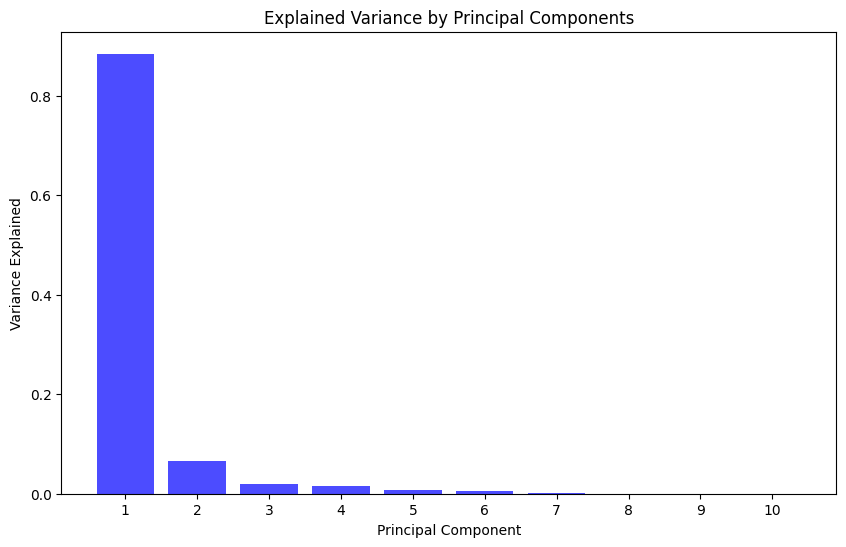

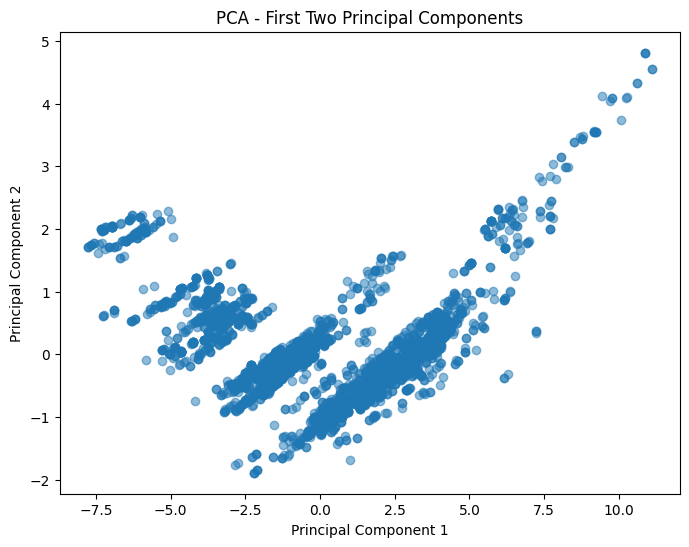

In [44]:
import matplotlib.pyplot as plt

# Step 1: Visualizing the explained variance by each principal component
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance_new) + 1), explained_variance_new, alpha=0.7, color='blue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_new) + 1))
plt.show()

# Step 2: Scatter plot of the reduced data in the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(reduced_data_new[:, 0], reduced_data_new[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


These visualizations can help you understand the impact of dimensionality reduction and how the data clusters based on the first two components.